In [1]:
# Import libraries




import matplotlib.pyplot as plt
import seaborn as sns

import os 
import os.path
import numpy as np
from numpy import random
import pandas as pd  # data frame operations  
import matplotlib.pyplot as plt  # static plotting
import matplotlib as mpl
from matplotlib.ticker import FuncFormatter
import matplotlib.dates as mdates
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import FixedLocator, FixedFormatter
from datetime import datetime
import seaborn as sns
from matplotlib.pyplot import figure
import warnings
warnings.filterwarnings('ignore')


In [2]:
# load diabetes dataset
cdc_diabetes_df = pd.read_csv('cdc-nhanes-2007-20018.csv')

In [3]:

df_diabetes_yes = cdc_diabetes_df.loc[(cdc_diabetes_df['DiabetesCond'] == 'Borderline') | (cdc_diabetes_df['DiabetesCond'] == 'Yes')] 

df_diabetes_pre = cdc_diabetes_df.loc[cdc_diabetes_df['Prediabetes'] == 'Yes']
Ttl_pre = len(df_diabetes_pre)
print(Ttl_pre)

2137


In [4]:

Ttl_yes = len(df_diabetes_yes)
print(Ttl_yes)


5591


In [5]:
df_diabetes_no = cdc_diabetes_df.loc[(cdc_diabetes_df['DiabetesCond'] == 'No') & (cdc_diabetes_df['Prediabetes'] != 'Yes')] 
Ttl_no = len(df_diabetes_no)
print(Ttl_no)

6972


In [6]:
key_names = {'FamilyHistory', 'Overweight',  'PoorDiet',  'LackOfPhysicalActivity', 
             'HighBloodPressure', 'HighBloodSugar',  'HighCholesterol', 'Hypoglycemic', 'ExtremeHunger', 
             'Tingling/NumbnessInHandsFeet',  'BlurredVision', 'IncreasedFatigue', 'GestationalDiabetes', 
             'FrequentUrination', 'Thirst', 'CravingForSweet', 'PolycysticOvarianSyndrome'}

diabetes_features_yes = dict.fromkeys(key_names)

In [7]:
diabetes_features_yes['FamilyHistory'] = df_diabetes_yes['FamilyHistory'].value_counts()['Family history']/(Ttl_yes/1000)
diabetes_features_yes['Overweight'] = df_diabetes_yes['Overweight'].value_counts()['Overweight']/(Ttl_yes/1000)
diabetes_features_yes['PoorDiet'] = df_diabetes_yes['PoorDiet'].value_counts()['Poor diet']/(Ttl_yes/1000)
diabetes_features_yes['LackOfPhysicalActivity'] = df_diabetes_yes['LackOfPhysicalActivity'].value_counts()['Lack of physical activity']/(Ttl_yes/1000)
diabetes_features_yes['HighBloodPressure'] = df_diabetes_yes['HighBloodPressure'].value_counts()['High blood pressure']/(Ttl_yes/1000)
diabetes_features_yes['HighBloodSugar'] = df_diabetes_yes['HighBloodSugar'].value_counts()['High blood sugar']/(Ttl_yes/1000)
diabetes_features_yes['HighCholesterol'] = df_diabetes_yes['HighCholesterol'].value_counts()['High cholesterol']/(Ttl_yes/1000)
diabetes_features_yes['Hypoglycemic'] = df_diabetes_yes['Hypoglycemic'].value_counts()['Hypoglycemic']/(Ttl_yes/1000)
diabetes_features_yes['ExtremeHunger'] = df_diabetes_yes['ExtremeHunger'].value_counts()['Extreme hunger']/(Ttl_yes/1000)
diabetes_features_yes['Tingling/NumbnessInHandsFeet'] = df_diabetes_yes['Tingling/NumbnessInHandsFeet'].value_counts()['Tingling/numbness in hands or feet']/(Ttl_yes/1000)
diabetes_features_yes['BlurredVision'] = df_diabetes_yes['BlurredVision'].value_counts()['Blurred vision']/(Ttl_yes/1000)
diabetes_features_yes['IncreasedFatigue'] = df_diabetes_yes['IncreasedFatigue'].value_counts()['Increased fatigue']/(Ttl_yes/1000)
diabetes_features_yes['GestationalDiabetes'] = df_diabetes_yes['GestationalDiabetes'].value_counts()['Gestational diabetes']/(Ttl_yes/1000)
diabetes_features_yes['FrequentUrination'] = df_diabetes_yes['FrequentUrination'].value_counts()['Frequent urination']/(Ttl_yes/1000)
diabetes_features_yes['Thirst'] = df_diabetes_yes['Thirst'].value_counts()['Thirst']/(Ttl_yes/1000)
diabetes_features_yes['CravingForSweet'] = df_diabetes_yes['CravingForSweet'].value_counts()['Craving for sweet/eating a lot of sugar']/(Ttl_yes/1000)
diabetes_features_yes['PolycysticOvarianSyndrome'] = df_diabetes_yes['PolycysticOvarianSyndrome'].value_counts()['Polycystic ovarian syndrome']/(Ttl_yes/1000)


features_yes = list(diabetes_features_yes.keys())
values_yes = list(diabetes_features_yes.values())

In [8]:
print(diabetes_features_yes)

{'LackOfPhysicalActivity': 15.20300482918977, 'ExtremeHunger': 3.219459846181363, 'HighCholesterol': 13.593274906099087, 'BlurredVision': 6.438919692362726, 'HighBloodSugar': 14.129851547129315, 'IncreasedFatigue': 8.764085136827044, 'CravingForSweet': 0.8942944017170452, 'PoorDiet': 25.040243248077267, 'FamilyHistory': 53.478805222679306, 'Hypoglycemic': 2.6828832051511355, 'Tingling/NumbnessInHandsFeet': 9.30066177785727, 'FrequentUrination': 5.72348417098909, 'GestationalDiabetes': 2.5040243248077267, 'Thirst': 5.902343051332498, 'HighBloodPressure': 19.674476837774996, 'PolycysticOvarianSyndrome': 0.17885888034340905, 'Overweight': 36.84492935074226}


In [9]:
diabetes_features_pre = dict.fromkeys(key_names)

diabetes_features_pre['FamilyHistory'] = df_diabetes_pre['FamilyHistory'].value_counts()['Family history']/(Ttl_pre/1000)
diabetes_features_pre['Overweight'] = df_diabetes_pre['Overweight'].value_counts()['Overweight']/(Ttl_pre/1000)
diabetes_features_pre['PoorDiet'] = df_diabetes_pre['PoorDiet'].value_counts()['Poor diet']/(Ttl_pre/1000)
diabetes_features_pre['LackOfPhysicalActivity'] = df_diabetes_pre['LackOfPhysicalActivity'].value_counts()['Lack of physical activity']/(Ttl_pre/1000)
diabetes_features_pre['HighBloodPressure'] = df_diabetes_pre['HighBloodPressure'].value_counts()['High blood pressure']/(Ttl_pre/1000)
diabetes_features_pre['HighBloodSugar'] = df_diabetes_pre['HighBloodSugar'].value_counts()['High blood sugar']/(Ttl_pre/1000)
diabetes_features_pre['HighCholesterol'] = df_diabetes_pre['HighCholesterol'].value_counts()['High cholesterol']/(Ttl_pre/1000)
diabetes_features_pre['Hypoglycemic'] = df_diabetes_pre['Hypoglycemic'].value_counts()['Hypoglycemic']/(Ttl_pre/1000)
diabetes_features_pre['ExtremeHunger'] = df_diabetes_pre['ExtremeHunger'].value_counts()['Extreme hunger']/(Ttl_pre/1000)
diabetes_features_pre['Tingling/NumbnessInHandsFeet'] = df_diabetes_pre['Tingling/NumbnessInHandsFeet'].value_counts()['Tingling/numbness in hands or feet']/(Ttl_pre/1000)
diabetes_features_pre['BlurredVision'] = df_diabetes_pre['BlurredVision'].value_counts()['Blurred vision']/(Ttl_pre/1000)
diabetes_features_pre['IncreasedFatigue'] = df_diabetes_pre['IncreasedFatigue'].value_counts()['Increased fatigue']/(Ttl_pre/1000)
diabetes_features_pre['GestationalDiabetes'] = df_diabetes_pre['GestationalDiabetes'].value_counts()['Gestational diabetes']/(Ttl_pre/1000)
diabetes_features_pre['FrequentUrination'] = df_diabetes_pre['FrequentUrination'].value_counts()['Frequent urination']/(Ttl_pre/1000)
diabetes_features_pre['Thirst'] = df_diabetes_pre['Thirst'].value_counts()['Thirst']/(Ttl_pre/1000)
diabetes_features_pre['CravingForSweet'] = df_diabetes_pre['CravingForSweet'].value_counts()['Craving for sweet/eating a lot of sugar']/(Ttl_pre/1000)
diabetes_features_pre['PolycysticOvarianSyndrome'] = df_diabetes_pre['PolycysticOvarianSyndrome'].value_counts()['Polycystic ovarian syndrome']/(Ttl_pre/1000)
values_pre = list(diabetes_features_pre.values())
print(diabetes_features_pre)

{'LackOfPhysicalActivity': 113.71080954609265, 'ExtremeHunger': 24.333177351427235, 'HighCholesterol': 88.90968647636875, 'BlurredVision': 45.390734674777725, 'HighBloodSugar': 60.364997660271406, 'IncreasedFatigue': 58.96116050538138, 'CravingForSweet': 3.7435657463734207, 'PoorDiet': 155.35797847449695, 'FamilyHistory': 329.43378568086104, 'Hypoglycemic': 12.634534394010295, 'Tingling/NumbnessInHandsFeet': 54.749649040711276, 'FrequentUrination': 42.58306036499766, 'GestationalDiabetes': 14.974262985493683, 'Thirst': 39.30744033692092, 'HighBloodPressure': 122.13383247543285, 'PolycysticOvarianSyndrome': 1.4038371548900328, 'Overweight': 249.41506785212914}


In [10]:
diabetes_features_no = dict.fromkeys(key_names)

diabetes_features_no['FamilyHistory'] = df_diabetes_no['FamilyHistory'].value_counts()['Family history']/(Ttl_no/1000)
diabetes_features_no['Overweight'] = df_diabetes_no['Overweight'].value_counts()['Overweight']/(Ttl_no/1000)
diabetes_features_no['PoorDiet'] = df_diabetes_no['PoorDiet'].value_counts()['Poor diet']/(Ttl_no/1000)
diabetes_features_no['LackOfPhysicalActivity'] = df_diabetes_no['LackOfPhysicalActivity'].value_counts()['Lack of physical activity']/(Ttl_no/1000)
diabetes_features_no['HighBloodPressure'] = df_diabetes_no['HighBloodPressure'].value_counts()['High blood pressure']/(Ttl_no/1000)
diabetes_features_no['HighBloodSugar'] = df_diabetes_no['HighBloodSugar'].value_counts()['High blood sugar']/(Ttl_no/1000)
diabetes_features_no['HighCholesterol'] = df_diabetes_no['HighCholesterol'].value_counts()['High cholesterol']/(Ttl_no/1000)
diabetes_features_no['Hypoglycemic'] = df_diabetes_no['Hypoglycemic'].value_counts()['Hypoglycemic']/(Ttl_no/1000)
diabetes_features_no['ExtremeHunger'] = df_diabetes_no['ExtremeHunger'].value_counts()['Extreme hunger']/(Ttl_no/1000)
diabetes_features_no['Tingling/NumbnessInHandsFeet'] = df_diabetes_no['Tingling/NumbnessInHandsFeet'].value_counts()['Tingling/numbness in hands or feet']/(Ttl_no/1000)
diabetes_features_no['BlurredVision'] = df_diabetes_no['BlurredVision'].value_counts()['Blurred vision']/(Ttl_no/1000)
diabetes_features_no['IncreasedFatigue'] = df_diabetes_no['IncreasedFatigue'].value_counts()['Increased fatigue']/(Ttl_no/1000)
diabetes_features_no['GestationalDiabetes'] = df_diabetes_no['GestationalDiabetes'].value_counts()['Gestational diabetes']/(Ttl_no/1000)
diabetes_features_no['FrequentUrination'] = df_diabetes_no['FrequentUrination'].value_counts()['Frequent urination']/(Ttl_no/1000)
diabetes_features_no['Thirst'] = df_diabetes_no['Thirst'].value_counts()['Thirst']/(Ttl_no/1000)
diabetes_features_no['CravingForSweet'] = df_diabetes_no['CravingForSweet'].value_counts()['Craving for sweet/eating a lot of sugar']/(Ttl_no/1000)
diabetes_features_no['PolycysticOvarianSyndrome'] = df_diabetes_no['PolycysticOvarianSyndrome'].value_counts()['Polycystic ovarian syndrome']/(Ttl_no/1000)
values_no = list(diabetes_features_no.values())
print(diabetes_features_no)

{'LackOfPhysicalActivity': 85.19793459552496, 'ExtremeHunger': 21.80149168100975, 'HighCholesterol': 35.57085484796328, 'BlurredVision': 28.255880665519218, 'HighBloodSugar': 9.609868043602983, 'IncreasedFatigue': 41.73838209982788, 'CravingForSweet': 5.450372920252438, 'PoorDiet': 163.3677567412507, 'FamilyHistory': 548.3362019506598, 'Hypoglycemic': 11.044176706827308, 'Tingling/NumbnessInHandsFeet': 43.31612162937464, 'FrequentUrination': 27.395295467584624, 'GestationalDiabetes': 10.470453241537578, 'Thirst': 26.10441767068273, 'HighBloodPressure': 69.5639701663798, 'PolycysticOvarianSyndrome': 0.7171543316121629, 'Overweight': 218.15834767641996}


In [11]:
print(features_yes)

['LackOfPhysicalActivity', 'ExtremeHunger', 'HighCholesterol', 'BlurredVision', 'HighBloodSugar', 'IncreasedFatigue', 'CravingForSweet', 'PoorDiet', 'FamilyHistory', 'Hypoglycemic', 'Tingling/NumbnessInHandsFeet', 'FrequentUrination', 'GestationalDiabetes', 'Thirst', 'HighBloodPressure', 'PolycysticOvarianSyndrome', 'Overweight']


In [12]:
df_features_yes = pd.DataFrame.from_dict(features_yes)
df_values_yes = pd.DataFrame.from_dict(values_yes)
df_values_pre = pd.DataFrame.from_dict(values_pre)
df_values_no = pd.DataFrame.from_dict(values_no)
print(df_features_yes)


                               0
0         LackOfPhysicalActivity
1                  ExtremeHunger
2                HighCholesterol
3                  BlurredVision
4                 HighBloodSugar
5               IncreasedFatigue
6                CravingForSweet
7                       PoorDiet
8                  FamilyHistory
9                   Hypoglycemic
10  Tingling/NumbnessInHandsFeet
11             FrequentUrination
12           GestationalDiabetes
13                        Thirst
14             HighBloodPressure
15     PolycysticOvarianSyndrome
16                    Overweight


In [13]:
df_values_pre = pd.DataFrame.from_dict(values_pre)

In [14]:
pd_all = pd.concat([df_features_yes, df_values_yes, df_values_pre, df_values_no], axis=1)
pd_all.columns =['Feature', 'Diabetes', 'PreDiabetes', 'No Diabetes']
pd_all.sort_values(by='Feature', inplace = True, ignore_index=True)
print(pd_all)

                         Feature   Diabetes  PreDiabetes  No Diabetes
0                  BlurredVision   6.438920    45.390735    28.255881
1                CravingForSweet   0.894294     3.743566     5.450373
2                  ExtremeHunger   3.219460    24.333177    21.801492
3                  FamilyHistory  53.478805   329.433786   548.336202
4              FrequentUrination   5.723484    42.583060    27.395295
5            GestationalDiabetes   2.504024    14.974263    10.470453
6              HighBloodPressure  19.674477   122.133832    69.563970
7                 HighBloodSugar  14.129852    60.364998     9.609868
8                HighCholesterol  13.593275    88.909686    35.570855
9                   Hypoglycemic   2.682883    12.634534    11.044177
10              IncreasedFatigue   8.764085    58.961161    41.738382
11        LackOfPhysicalActivity  15.203005   113.710810    85.197935
12                    Overweight  36.844929   249.415068   218.158348
13     PolycysticOva

<function matplotlib.pyplot.show(*args, **kw)>

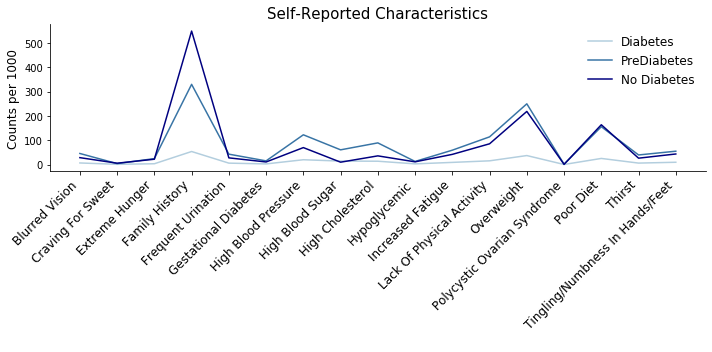

In [289]:
ax = pd_all.plot( x='Feature', color = ['#b3cede', '#3874a5','navy'])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title(label="Self-Reported Characteristics", fontsize=15, loc='center')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.yaxis.set_minor_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_xlabel(' ')
ax.set_ylabel('Counts per 1000',fontsize=12)
plt.rcParams["figure.figsize"] = [15, 5]
plt.rcParams["figure.autolayout"] = True
ax.set_xticks( range(len(pd_all.Feature)),[pd_all.Feature] )
x_formatter = FixedFormatter(['Blurred Vision','Craving For Sweet','Extreme Hunger','Family History','Frequent Urination','Gestational Diabetes',
                   'High Blood Pressure','High Blood Sugar','High Cholesterol','Hypoglycemic','Increased Fatigue','Lack Of Physical Activity',
                  'Overweight','Polycystic Ovarian Syndrome','Poor Diet','Thirst','Tingling/Numbness In Hands/Feet'])
x_locator = FixedLocator([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
ax.xaxis.set_major_formatter(x_formatter)
ax.xaxis.set_major_locator(x_locator)
plt.xticks(rotation=45,fontsize=12, ha='right')
plt.legend(frameon=False, fontsize=12,bbox_to_anchor=(1, 1))
#plt.savefig('Characteristics.png', bbox_inches='tight')
plt.show

In [205]:
df_profile = cdc_diabetes_df[['DiabetesCond','Prediabetes','Gender','Age_y','Race_y','CurrentSelfReportedHeight(inches)',
                              'CurrentSelfReportedWeight(pounds)','GeneralHealthCond','AnnualHousehldIncome']]

In [206]:
df_profile.rename(columns = {'Age_y':'Age', 'Race_y':'Race','CurrentSelfReportedHeight(inches)':'Height',
                            'CurrentSelfReportedWeight(pounds)':'Weight','GeneralHealthCond':'Health'},inplace=True)

In [207]:
#df_profile.convert_objects(convert_numeric=True, inplace = True)
#df['range'] = df['range'].str.replace(',','-')
df_profile['Height'].replace({'Do not know': 0}, inplace=True)
df_profile['Weight'].replace({'Do not know': 0}, inplace=True)
df_profile['Height'].replace({'Refused': 0}, inplace=True)
df_profile['Weight'].replace({'Refused': 0}, inplace=True)
df_profile['Health'].replace({'Refused': 'Unknown'}, inplace=True)
df_profile['Health'].replace({'Do not know': 'Unknown'}, inplace=True)

In [208]:
df_profile['Height']=df_profile['Height'].fillna(0)
df_profile['Weight']=df_profile['Weight'].fillna(0)

In [209]:
df_profile['Height'] = pd.to_numeric(df_profile['Height'])
df_profile['Weight'] = pd.to_numeric(df_profile['Weight'])
df_profile['Height']=df_profile['Height'].replace(0,df_profile['Height'].mean())
df_profile['Weight']=df_profile['Weight'].replace(0,df_profile['Weight'].mean())

In [210]:
df_profile['BMI']=(df_profile.Weight/df_profile.Height/df_profile.Height)*703

In [211]:
df_profile['AnnualHousehldIncome'].replace({'Do not know': 'Unknown'}, inplace=True)
df_profile['AnnualHousehldIncome'].replace({'Refused': 'Unknown'}, inplace=True)

df_profile['AnnualHousehldIncome'].replace({'$25,000 to $34,999': '25,000 to 49,999'}, inplace=True)
df_profile['AnnualHousehldIncome'].replace({'$45,000 to $54,999': '25,000 to 49,999'}, inplace=True)
df_profile['AnnualHousehldIncome'].replace({'$35,000 to $44,999': '25,000 to 49,999'}, inplace=True)
df_profile['AnnualHousehldIncome'].replace({'$20,000 and Over': '25,000 to 49,999'}, inplace=True)


df_profile['AnnualHousehldIncome'].replace({'$0 to $4,999': '0 to 24,999'}, inplace=True)
df_profile['AnnualHousehldIncome'].replace({'Under $20,000': '0 to 24,999'}, inplace=True)
df_profile['AnnualHousehldIncome'].replace({'$15,000 to $19,999': '0 to 24,999'}, inplace=True)
df_profile['AnnualHousehldIncome'].replace({'$10,000 to $14,999': '0 to 24,999'}, inplace=True)
df_profile['AnnualHousehldIncome'].replace({'$5,000 to $9,999': '0 to 24,999'}, inplace=True)
df_profile['AnnualHousehldIncome'].replace({'$20,000 to $24,999': '0 to 24,999'}, inplace=True)

df_profile['AnnualHousehldIncome'].replace({'$55,000 to $64,999': '50,000 to 74,999'}, inplace=True)
df_profile['AnnualHousehldIncome'].replace({'$65,000 to $74,999': '50,000 to 74,999'}, inplace=True)

df_profile['AnnualHousehldIncome'].replace({'$75,000 to $99,999': '75,000 to 99,999'}, inplace=True)
df_profile['AnnualHousehldIncome'].replace({'$100,000 and Over': '100,000 and Over'}, inplace=True)

df_profile['AnnualHousehldIncome']=df_profile['AnnualHousehldIncome'].fillna('Unknown')

In [212]:
df_profile['Age Group'] = pd.cut(df_profile.Age,bins=[0,15,30,45,60,75,150],labels=['Under 16','16-30','31-45','46-60','61-75','Over 75'])

In [213]:
#https://www.northshore.org/bariatric-surgery-services/obesity/?gclid=CjwKCAjw2vOLBhBPEiwAjEeK9g0Km7nD4B6cBJZwfRtzctuirNv1le2VghUkSzOSiwAFSE6n5vAglRoC8JMQAvD_BwE&gclsrc=aw.ds
df_profile['BMI Group'] = pd.cut(df_profile.BMI,bins=[0,19,24.9,29.9,34.9,39.9,49.9,80],labels=['Underweight','Ideal','Overweight','Obese','Severely Obese','Morbidly Obese','Super Obese'])


In [214]:
df_profile.head()

,DiabetesCond,Prediabetes,Gender,Age,Race,Height,Weight,Health,AnnualHousehldIncome,BMI,Age Group,BMI Group
0,No,No,Female,62,Other Race,62.00000,308.000000,Fair,"25,000 to 49,999",56.327784,61-75,Super Obese
1,Yes,NaN,Male,71,Non-Hispanic White,68.00000,190.000000,Good,"0 to 24,999",28.886246,61-75,Overweight
2,Yes,NaN,Male,66,Non-Hispanic Black,71.00000,289.000000,Fair,"0 to 24,999",40.302916,61-75,Morbidly Obese
3,Borderline,NaN,Male,61,Non-Hispanic White,73.00000,202.000000,Poor,"75,000 to 99,999",26.647776,61-75,Overweight
4,Yes,NaN,Female,64,Mexican American,61.98409,178.532839,Poor,"0 to 24,999",32.667280,61-75,Obese


In [244]:
#df_profile.to_csv('prof.csv')

In [216]:
df_profile_yes = df_profile.loc[(df_profile['DiabetesCond'] == 'Borderline') | (df_profile['DiabetesCond'] == 'Yes')] 
df_profile_no = df_profile.loc[(df_profile['DiabetesCond'] == 'No') & (df_profile['Prediabetes'] != 'Yes')] 
df_profile_pre = df_profile.loc[df_profile['Prediabetes'] == 'Yes']

In [217]:
Ttl_yes = len(df_profile_yes)
Ttl_no = len(df_profile_no)
Ttl_pre = len(df_profile_pre)

In [218]:
df_profile_yes.head()

,DiabetesCond,Prediabetes,Gender,Age,Race,Height,Weight,Health,AnnualHousehldIncome,BMI,Age Group,BMI Group
1,Yes,NaN,Male,71,Non-Hispanic White,68.00000,190.000000,Good,"0 to 24,999",28.886246,61-75,Overweight
2,Yes,NaN,Male,66,Non-Hispanic Black,71.00000,289.000000,Fair,"0 to 24,999",40.302916,61-75,Morbidly Obese
3,Borderline,NaN,Male,61,Non-Hispanic White,73.00000,202.000000,Poor,"75,000 to 99,999",26.647776,61-75,Overweight
4,Yes,NaN,Female,64,Mexican American,61.98409,178.532839,Poor,"0 to 24,999",32.667280,61-75,Obese
6,Yes,NaN,Male,70,Non-Hispanic White,69.00000,250.000000,Excellent,"25,000 to 49,999",36.914514,61-75,Severely Obese


In [219]:

gender_yes_male = df_profile_yes.loc[df_profile_yes['Gender'] == 'Male']
PctMaleYes= len(gender_yes_male['Gender'])/Ttl_yes
gender_yes_female = df_profile_yes.loc[df_profile_yes['Gender'] == 'Female']
PctFemaleYes= len(gender_yes_female['Gender'])/Ttl_yes


In [220]:
gender_no_male = df_profile_no.loc[df_profile_no['Gender'] == 'Male']
PctMaleNo= len(gender_no_male['Gender'])/Ttl_no
gender_no_female = df_profile_no.loc[df_profile_no['Gender'] == 'Female']
PctFemaleNo= len(gender_no_female['Gender'])/Ttl_no

In [221]:
gender_pre_male = df_profile_pre.loc[df_profile_pre['Gender'] == 'Male']
PctMalePre= len(gender_pre_male['Gender'])/Ttl_pre
gender_pre_female = df_profile_pre.loc[df_profile_pre['Gender'] == 'Female']
PctFemalePre= len(gender_pre_female['Gender'])/Ttl_pre

In [222]:
data = [['Diabetes',PctMaleYes,PctFemaleYes],['PreDiabetes',PctMalePre,PctFemalePre],['No Diabetes',PctMaleNo,PctFemaleNo]]
df_gender = pd.DataFrame(data, columns = ['Group', '% Male', '% Female'])
df_gender.head()

,Group,% Male,% Female
0,Diabetes,0.508138,0.491862
1,PreDiabetes,0.408517,0.591483
2,No Diabetes,0.437321,0.562679


<function matplotlib.pyplot.show(*args, **kw)>

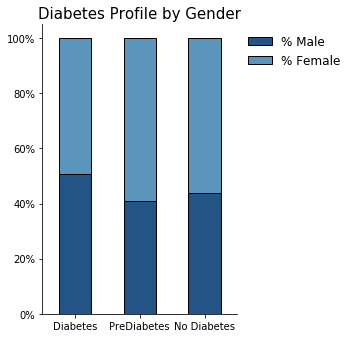

In [293]:
#Build a visual

pal = ['#235485','#5c95bb' ]

ax = df_gender.plot( x='Group',kind='bar', stacked=True,color=pal,align="center",edgecolor='black')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title(label="Diabetes Profile by Gender", fontsize=15, loc='center')
ax.set_xlabel(' ')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

plt.legend(frameon=False, bbox_to_anchor=(1, 1),fontsize=12)
plt.rcParams["figure.figsize"] = [5, 5]
#plt.rcParams["figure.autolayout"] = True
ax.set_xticks(range(len(df_gender.Group)))
plt.xticks(rotation=0,fontsize=10)
plt.yticks(fontsize=10)
#plt.savefig('GenderProfile.png', bbox_inches='tight')
plt.show

In [291]:
race_yes_MA = df_profile_yes.loc[df_profile_yes['Race'] == 'Mexican American']
PctMAYes= len(race_yes_MA['Race'])/Ttl_yes
race_yes_NHB = df_profile_yes.loc[df_profile_yes['Race'] == 'Non-Hispanic Black']
PctNHBYes= len(race_yes_NHB['Race'])/Ttl_yes
race_yes_NHW = df_profile_yes.loc[df_profile_yes['Race'] == 'Non-Hispanic White']
PctNHWYes= len(race_yes_NHW['Race'])/Ttl_yes
race_yes_OH = df_profile_yes.loc[df_profile_yes['Race'] == 'Other Hispanic']
PctOHYes= len(race_yes_OH['Race'])/Ttl_yes
race_yes_OR = df_profile_yes.loc[df_profile_yes['Race'] == 'Other Race']
PctORYes= len(race_yes_OR['Race'])/Ttl_yes

In [292]:
race_no_MA = df_profile_no.loc[df_profile_no['Race'] == 'Mexican American']
PctMAno= len(race_no_MA['Race'])/Ttl_no
race_no_NHB = df_profile_no.loc[df_profile_no['Race'] == 'Non-Hispanic Black']
PctNHBno= len(race_no_NHB['Race'])/Ttl_no
race_no_NHW = df_profile_no.loc[df_profile_no['Race'] == 'Non-Hispanic White']
PctNHWno= len(race_no_NHW['Race'])/Ttl_no
race_no_OH = df_profile_no.loc[df_profile_no['Race'] == 'Other Hispanic']
PctOHno= len(race_no_OH['Race'])/Ttl_no
race_no_OR = df_profile_no.loc[df_profile_no['Race'] == 'Other Race']
PctORno= len(race_no_OR['Race'])/Ttl_no

In [226]:
race_pre_MA = df_profile_pre.loc[df_profile_pre['Race'] == 'Mexican American']
PctMApre= len(race_pre_MA['Race'])/Ttl_pre
race_pre_NHB = df_profile_pre.loc[df_profile_pre['Race'] == 'Non-Hispanic Black']
PctNHBpre= len(race_pre_NHB['Race'])/Ttl_pre
race_pre_NHW = df_profile_pre.loc[df_profile_pre['Race'] == 'Non-Hispanic White']
PctNHWpre= len(race_pre_NHW['Race'])/Ttl_pre
race_pre_OH = df_profile_pre.loc[df_profile_pre['Race'] == 'Other Hispanic']
PctOHpre= len(race_pre_OH['Race'])/Ttl_pre
race_pre_OR = df_profile_pre.loc[df_profile_pre['Race'] == 'Other Race']
PctORpre= len(race_pre_OR['Race'])/Ttl_pre

In [227]:
data = [['Diabetes',PctMAYes,PctNHBYes,PctNHWYes,PctOHYes,PctORYes],
        ['PreDiabetes',PctMApre,PctNHBpre,PctNHWpre,PctOHpre,PctORpre],
        ['No Diabetes',PctMAno,PctNHBno,PctNHWno,PctOHno,PctORno]]
df_race = pd.DataFrame(data, columns = ['Group', '% Mexican American', '% Non-Hispanic Black','% Non-Hispanic White',
                                         '% Other Hispanic','% Other Race'])
df_race.head()

,Group,% Mexican American,% Non-Hispanic Black,% Non-Hispanic White,% Other Hispanic,% Other Race
0,Diabetes,0.168843,0.267573,0.342694,0.104811,0.116079
1,PreDiabetes,0.153486,0.212447,0.377164,0.114647,0.142255
2,No Diabetes,0.182874,0.224182,0.350115,0.100688,0.142140


<function matplotlib.pyplot.show(*args, **kw)>

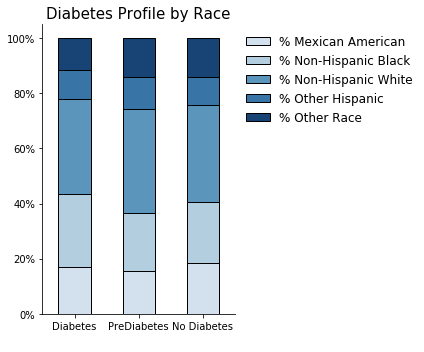

In [298]:

pal = ['#d3e1ee','#b3cede','#5c95bb', '#3874a5','#184375']

ax = df_race.plot( x='Group',kind='bar', stacked=True,color=pal,align="center",edgecolor='black')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title(label="Diabetes Profile by Race", fontsize=15, loc='center')
ax.set_xlabel(' ')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

plt.legend(frameon=False, bbox_to_anchor=(1, 1),fontsize=12)
plt.rcParams["figure.figsize"] = [6, 5]
#plt.rcParams["figure.autolayout"] = True
ax.set_xticks(range(len(df_race.Group)))
plt.xticks(rotation=0,fontsize=10)
plt.yticks(fontsize=10)
#plt.savefig('RaceProfile.png', bbox_inches='tight')
plt.show

In [295]:
health_yes_P = df_profile_yes.loc[df_profile_yes['Health'] == 'Poor']
PctPoorYes= len(health_yes_P['Health'])/Ttl_yes
health_yes_F = df_profile_yes.loc[df_profile_yes['Health'] == 'Fair']
PctFairYes= len(health_yes_F['Health'])/Ttl_yes
health_yes_G = df_profile_yes.loc[df_profile_yes['Health'] == 'Good']
PctGoodYes= len(health_yes_G['Health'])/Ttl_yes
health_yes_VG = df_profile_yes.loc[df_profile_yes['Health'] == 'Very good']
PctVGYes= len(health_yes_VG['Health'])/Ttl_yes
health_yes_Ex = df_profile_yes.loc[df_profile_yes['Health'] == 'Excellent']
PctExYes= len(health_yes_Ex['Health'])/Ttl_yes
health_yes_U = df_profile_yes.loc[df_profile_yes['Health'] == 'Unknown']
PctUYes= len(health_yes_U['Health'])/Ttl_yes

In [230]:
health_no_P = df_profile_no.loc[df_profile_no['Health'] == 'Poor']
PctPoorno= len(health_no_P['Health'])/Ttl_no
health_no_F = df_profile_no.loc[df_profile_no['Health'] == 'Fair']
PctFairno= len(health_no_F['Health'])/Ttl_no
health_no_G = df_profile_no.loc[df_profile_no['Health'] == 'Good']
PctGoodno= len(health_no_G['Health'])/Ttl_no
health_no_VG = df_profile_no.loc[df_profile_no['Health'] == 'Very good']
PctVGno= len(health_no_VG['Health'])/Ttl_no
health_no_Ex = df_profile_no.loc[df_profile_no['Health'] == 'Excellent']
PctExno= len(health_no_Ex['Health'])/Ttl_no
health_no_U = df_profile_no.loc[df_profile_no['Health'] == 'Unknown']
PctUno= len(health_no_U['Health'])/Ttl_no

In [231]:
health_pre_P = df_profile_pre.loc[df_profile_pre['Health'] == 'Poor']
PctPoorpre= len(health_pre_P['Health'])/Ttl_pre
health_pre_F = df_profile_pre.loc[df_profile_pre['Health'] == 'Fair']
PctFairpre= len(health_pre_F['Health'])/Ttl_pre
health_pre_G = df_profile_pre.loc[df_profile_pre['Health'] == 'Good']
PctGoodpre= len(health_pre_G['Health'])/Ttl_pre
health_pre_VG = df_profile_pre.loc[df_profile_pre['Health'] == 'Very good']
PctVGpre= len(health_pre_VG['Health'])/Ttl_pre
health_pre_Ex = df_profile_pre.loc[df_profile_pre['Health'] == 'Excellent']
PctExpre= len(health_pre_Ex['Health'])/Ttl_pre
health_pre_U = df_profile_pre.loc[df_profile_pre['Health'] == 'Unknown']
PctUpre= len(health_pre_U['Health'])/Ttl_pre

In [232]:
data = [['Diabetes',PctPoorYes,PctFairYes,PctGoodYes,PctVGYes,PctExYes,PctUYes],
        ['PreDiabetes',PctPoorpre,PctFairpre,PctGoodpre,PctVGpre,PctExpre,PctUpre],
        ['No Diabetes',PctPoorno,PctFairno,PctGoodno,PctVGno,PctExno,PctUno]]
df_health = pd.DataFrame(data, columns = ['Group', '% Poor', '% Fair','% Good',
                                         '% Very Good','% Excellent','% Unknown'])
df_health.head()

,Group,% Poor,% Fair,% Good,% Very Good,% Excellent,% Unknown
0,Diabetes,0.123413,0.358970,0.355035,0.131104,0.030406,0.001073
1,PreDiabetes,0.046795,0.248011,0.398222,0.241928,0.064109,0.000936
2,No Diabetes,0.037866,0.186890,0.394435,0.269363,0.110729,0.000717


<function matplotlib.pyplot.show(*args, **kw)>

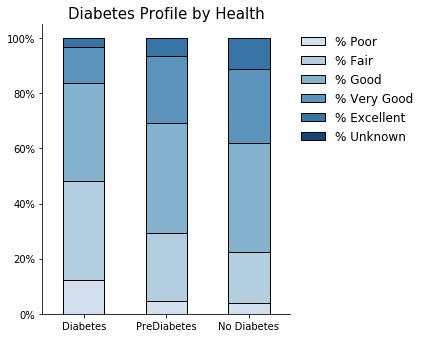

In [299]:

pal = ['#d3e1ee','#b3cede','#85b2cd','#5c95bb', '#3874a5','#184375']

ax = df_health.plot( x='Group',kind='bar', stacked=True,color=pal,align="center",edgecolor='black')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title(label="Diabetes Profile by Health", fontsize=15, loc='center')
ax.set_xlabel(' ')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

plt.legend(frameon=False, bbox_to_anchor=(1, 1),fontsize=12)
plt.rcParams["figure.figsize"] = [5, 5]
#plt.rcParams["figure.autolayout"] = True
ax.set_xticks(range(len(df_health.Group)))
plt.xticks(rotation=0,fontsize=10)
plt.yticks(fontsize=10)
#plt.savefig('HealthProfile.png', bbox_inches='tight')
plt.show

In [234]:
age_yes_U16 = df_profile_yes.loc[df_profile_yes['Age Group'] == 'Under 16']
PctU16Yes= len(age_yes_U16['Age Group'])/Ttl_yes
age_yes_30 = df_profile_yes.loc[df_profile_yes['Age Group'] == '16-30']
Pct30Yes= len(age_yes_30['Age Group'])/Ttl_yes
age_yes_45 = df_profile_yes.loc[df_profile_yes['Age Group'] == '31-45']
Pct45Yes= len(age_yes_45['Age Group'])/Ttl_yes
age_yes_60 = df_profile_yes.loc[df_profile_yes['Age Group'] == '46-60']
Pct60Yes= len(age_yes_60['Age Group'])/Ttl_yes
age_yes_75 = df_profile_yes.loc[df_profile_yes['Age Group'] == '61-75']
Pct75Yes= len(age_yes_75['Age Group'])/Ttl_yes
age_yes_O75 = df_profile_yes.loc[df_profile_yes['Age Group'] == 'Over 75']
PctO75Yes= len(age_yes_O75['Age Group'])/Ttl_yes

In [235]:
age_pre_U16 = df_profile_pre.loc[df_profile_pre['Age Group'] == 'Under 16']
PctU16pre= len(age_pre_U16['Age Group'])/Ttl_pre
age_pre_30 = df_profile_pre.loc[df_profile_pre['Age Group'] == '16-30']
Pct30pre= len(age_pre_30['Age Group'])/Ttl_pre
age_pre_45 = df_profile_pre.loc[df_profile_pre['Age Group'] == '31-45']
Pct45pre= len(age_pre_45['Age Group'])/Ttl_pre
age_pre_60 = df_profile_pre.loc[df_profile_pre['Age Group'] == '46-60']
Pct60pre= len(age_pre_60['Age Group'])/Ttl_pre
age_pre_75 = df_profile_pre.loc[df_profile_pre['Age Group'] == '61-75']
Pct75pre= len(age_pre_75['Age Group'])/Ttl_pre
age_pre_O75 = df_profile_pre.loc[df_profile_pre['Age Group'] == 'Over 75']
PctO75pre= len(age_pre_O75['Age Group'])/Ttl_pre

In [236]:
age_no_U16 = df_profile_no.loc[df_profile_no['Age Group'] == 'Under 16']
PctU16no= len(age_no_U16['Age Group'])/Ttl_no
age_no_30 = df_profile_no.loc[df_profile_no['Age Group'] == '16-30']
Pct30no= len(age_no_30['Age Group'])/Ttl_no
age_no_45 = df_profile_no.loc[df_profile_no['Age Group'] == '31-45']
Pct45no= len(age_no_45['Age Group'])/Ttl_no
age_no_60 = df_profile_no.loc[df_profile_no['Age Group'] == '46-60']
Pct60no= len(age_no_60['Age Group'])/Ttl_no
age_no_75 = df_profile_no.loc[df_profile_no['Age Group'] == '61-75']
Pct75no= len(age_no_75['Age Group'])/Ttl_no
age_no_O75 = df_profile_no.loc[df_profile_no['Age Group'] == 'Over 75']
PctO75no= len(age_no_O75['Age Group'])/Ttl_no

In [237]:
data = [['Diabetes',PctU16Yes,Pct30Yes,Pct45Yes,Pct60Yes,Pct75Yes,PctO75Yes],
        ['PreDiabetes',PctU16pre,Pct30pre,Pct45pre,Pct60pre,Pct75pre,PctO75pre],
        ['No Diabetes',PctU16no,Pct30no,Pct45no,Pct60no,Pct75no,PctO75no]]
df_age = pd.DataFrame(data, columns = ['Group', '% Under 16', '% 16-30','% 31-45',
                                         '% 46-60','% 61-75','% Over 75'])
df_age.head()

,Group,% Under 16,% 16-30,% 31-45,% 46-60,% 61-75,% Over 75
0,Diabetes,0.017170,0.029869,0.100876,0.279914,0.404758,0.167412
1,PreDiabetes,0.019654,0.104352,0.197941,0.296210,0.282171,0.099672
2,No Diabetes,0.073723,0.298623,0.273523,0.212134,0.115605,0.026391


<function matplotlib.pyplot.show(*args, **kw)>

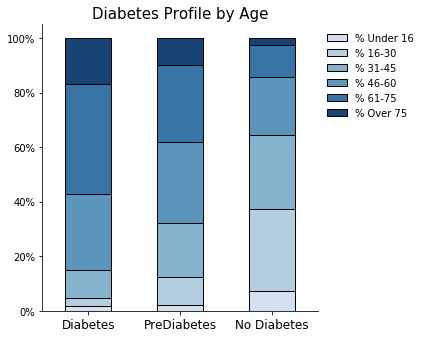

In [303]:
pal = ['#d3e1ee','#b3cede','#85b2cd','#5c95bb', '#3874a5','#184375']

ax = df_age.plot( x='Group',kind='bar', stacked=True,color=pal,align="center",edgecolor='black')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title(label="Diabetes Profile by Age", fontsize=15, loc='center')
ax.set_xlabel(' ')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

plt.legend(frameon=False, bbox_to_anchor=(1, 1),fontsize=10)
plt.rcParams["figure.figsize"] = [6, 5]
#plt.rcParams["figure.autolayout"] = True
ax.set_xticks(range(len(df_age.Group)))
plt.xticks(rotation=0,fontsize=12)
plt.yticks(fontsize=10)
#plt.savefig('AgeProfile.png', bbox_inches='tight')
plt.show

In [239]:
BMI_yes_U = df_profile_yes.loc[df_profile_yes['BMI Group'] == 'Underweight']
PctUYes= len(BMI_yes_U['BMI Group'])/Ttl_yes
BMI_yes_I = df_profile_yes.loc[df_profile_yes['BMI Group'] == 'Ideal']
PctIYes= len(BMI_yes_I['BMI Group'])/Ttl_yes
BMI_yes_Ov = df_profile_yes.loc[df_profile_yes['BMI Group'] == 'Overweight']
PctOvYes= len(BMI_yes_Ov['BMI Group'])/Ttl_yes
BMI_yes_Ob = df_profile_yes.loc[df_profile_yes['BMI Group'] == 'Obese']
PctObYes= len(BMI_yes_Ob['BMI Group'])/Ttl_yes
BMI_yes_So = df_profile_yes.loc[df_profile_yes['BMI Group'] == 'Severely Obese']
PctSoYes= len(BMI_yes_So['BMI Group'])/Ttl_yes
BMI_yes_Mo = df_profile_yes.loc[df_profile_yes['BMI Group'] == 'Morbidly Obese']
PctMoYes= len(BMI_yes_Mo['BMI Group'])/Ttl_yes
BMI_yes_Su = df_profile_yes.loc[df_profile_yes['BMI Group'] == 'Super Obese']
PctSuYes= len(BMI_yes_Su['BMI Group'])/Ttl_yes

In [240]:
BMI_pre_U = df_profile_pre.loc[df_profile_pre['BMI Group'] == 'Underweight']
PctUpre= len(BMI_pre_U['BMI Group'])/Ttl_pre
BMI_pre_I = df_profile_pre.loc[df_profile_pre['BMI Group'] == 'Ideal']
PctIpre= len(BMI_pre_I['BMI Group'])/Ttl_pre
BMI_pre_Ov = df_profile_pre.loc[df_profile_pre['BMI Group'] == 'Overweight']
PctOvpre= len(BMI_pre_Ov['BMI Group'])/Ttl_pre
BMI_pre_Ob = df_profile_pre.loc[df_profile_pre['BMI Group'] == 'Obese']
PctObpre= len(BMI_pre_Ob['BMI Group'])/Ttl_pre
BMI_pre_So = df_profile_pre.loc[df_profile_pre['BMI Group'] == 'Severely Obese']
PctSopre= len(BMI_pre_So['BMI Group'])/Ttl_pre
BMI_pre_Mo = df_profile_pre.loc[df_profile_pre['BMI Group'] == 'Morbidly Obese']
PctMopre= len(BMI_pre_Mo['BMI Group'])/Ttl_pre
BMI_pre_Su = df_profile_pre.loc[df_profile_pre['BMI Group'] == 'Super Obese']
PctSupre= len(BMI_pre_Su['BMI Group'])/Ttl_pre

In [241]:
BMI_no_U = df_profile_no.loc[df_profile_no['BMI Group'] == 'Underweight']
PctUno= len(BMI_no_U['BMI Group'])/Ttl_no
BMI_no_I = df_profile_no.loc[df_profile_no['BMI Group'] == 'Ideal']
PctIno= len(BMI_no_I['BMI Group'])/Ttl_no
BMI_no_Ov = df_profile_no.loc[df_profile_no['BMI Group'] == 'Overweight']
PctOvno= len(BMI_no_Ov['BMI Group'])/Ttl_no
BMI_no_Ob = df_profile_no.loc[df_profile_no['BMI Group'] == 'Obese']
PctObno= len(BMI_no_Ob['BMI Group'])/Ttl_no
BMI_no_So = df_profile_no.loc[df_profile_no['BMI Group'] == 'Severely Obese']
PctSono= len(BMI_no_So['BMI Group'])/Ttl_no
BMI_no_Mo = df_profile_no.loc[df_profile_no['BMI Group'] == 'Morbidly Obese']
PctMono= len(BMI_no_Mo['BMI Group'])/Ttl_no
BMI_no_Su = df_profile_no.loc[df_profile_no['BMI Group'] == 'Super Obese']
PctSuno= len(BMI_no_Su['BMI Group'])/Ttl_no

In [242]:
data = [['Diabetes',PctUYes,PctIYes,PctOvYes,PctObYes,PctSoYes,PctMoYes,PctSuYes],
        ['PreDiabetes',PctUpre,PctIpre,PctOvpre,PctObpre,PctSopre,PctMopre,PctSupre],
        ['No Diabetes',PctUno,PctIno,PctOvno,PctObno,PctSono,PctMono,PctSuno]]
df_BMI = pd.DataFrame(data, columns = ['Group', '% Underweight', '% Ideal','% Overweight',
                                         '% Obese','% Severely Obese','% Morbidly Obese','% Super Obese'])
df_BMI.head()

,Group,% Underweight,% Ideal,% Overweight,% Obese,% Severely Obese,% Morbidly Obese,% Super Obese
0,Diabetes,0.008406,0.146307,0.312645,0.289036,0.132713,0.090860,0.020032
1,PreDiabetes,0.009827,0.196537,0.308376,0.263453,0.125409,0.082358,0.014038
2,No Diabetes,0.020941,0.229920,0.288439,0.279977,0.096959,0.068130,0.015491


<function matplotlib.pyplot.show(*args, **kw)>

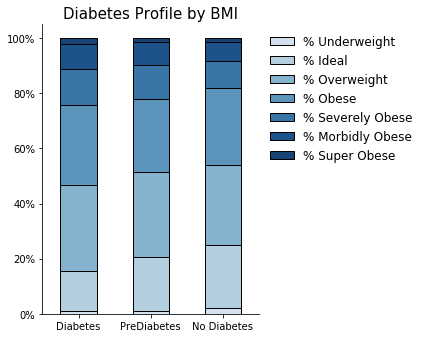

In [304]:
pal = ['#d3e1ee','#b3cede','#85b2cd','#5c95bb', '#3874a5','#1c538b','#184375']

ax = df_BMI.plot( x='Group',kind='bar', stacked=True,color=pal,align="center",edgecolor='black')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title(label="Diabetes Profile by BMI", fontsize=15, loc='center')
ax.set_xlabel(' ')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

plt.legend(frameon=False, bbox_to_anchor=(1, 1),fontsize=12)
plt.rcParams["figure.figsize"] = [5, 5]
#plt.rcParams["figure.autolayout"] = True
ax.set_xticks(range(len(df_BMI.Group)))
plt.xticks(rotation=0,fontsize=10)
plt.yticks(fontsize=10)
#plt.savefig('BMIProfile.png', bbox_inches='tight')
plt.show

In [281]:
inc_yes_U24 = df_profile_yes.loc[df_profile_yes['AnnualHousehldIncome'] == '0 to 24,999']
PctU24Yes= len(inc_yes_U24['AnnualHousehldIncome'])/Ttl_yes
inc_yes_49 = df_profile_yes.loc[df_profile_yes['AnnualHousehldIncome'] == '25,000 to 49,999']
Pct49Yes= len(inc_yes_49['AnnualHousehldIncome'])/Ttl_yes
inc_yes_74 = df_profile_yes.loc[df_profile_yes['AnnualHousehldIncome'] == '50,000 to 74,999']
Pct74Yes= len(inc_yes_74['AnnualHousehldIncome'])/Ttl_yes
inc_yes_99 = df_profile_yes.loc[df_profile_yes['AnnualHousehldIncome'] == '75,000 to 99,999']
Pct99Yes= len(inc_yes_99['AnnualHousehldIncome'])/Ttl_yes
inc_yes_100 = df_profile_yes.loc[df_profile_yes['AnnualHousehldIncome'] == '100,000 and Over']
Pct100Yes= len(inc_yes_100['AnnualHousehldIncome'])/Ttl_yes
inc_yes_U = df_profile_yes.loc[df_profile_yes['AnnualHousehldIncome'] == 'Unknown']
PctUYes= len(inc_yes_U['AnnualHousehldIncome'])/Ttl_yes

In [246]:
inc_pre_U24 = df_profile_pre.loc[df_profile_pre['AnnualHousehldIncome'] == '0 to 24,999']
PctU24pre= len(inc_pre_U24['AnnualHousehldIncome'])/Ttl_pre
inc_pre_49 = df_profile_pre.loc[df_profile_pre['AnnualHousehldIncome'] == '25,000 to 49,999']
Pct49pre= len(inc_pre_49['AnnualHousehldIncome'])/Ttl_pre
inc_pre_74 = df_profile_pre.loc[df_profile_pre['AnnualHousehldIncome'] == '50,000 to 74,999']
Pct74pre= len(inc_pre_74['AnnualHousehldIncome'])/Ttl_pre
inc_pre_99 = df_profile_pre.loc[df_profile_pre['AnnualHousehldIncome'] == '75,000 to 99,999']
Pct99pre= len(inc_pre_99['AnnualHousehldIncome'])/Ttl_pre
inc_pre_100 = df_profile_pre.loc[df_profile_pre['AnnualHousehldIncome'] == '100,000 and Over']
Pct100pre= len(inc_pre_100['AnnualHousehldIncome'])/Ttl_pre
inc_pre_U = df_profile_pre.loc[df_profile_pre['AnnualHousehldIncome'] == 'Unknown']
PctUpre= len(inc_pre_U['AnnualHousehldIncome'])/Ttl_pre

In [247]:
inc_no_U24 = df_profile_no.loc[df_profile_no['AnnualHousehldIncome'] == '0 to 24,999']
PctU24no= len(inc_no_U24['AnnualHousehldIncome'])/Ttl_no
inc_no_49 = df_profile_no.loc[df_profile_no['AnnualHousehldIncome'] == '25,000 to 49,999']
Pct49no= len(inc_no_49['AnnualHousehldIncome'])/Ttl_no
inc_no_74 = df_profile_no.loc[df_profile_no['AnnualHousehldIncome'] == '50,000 to 74,999']
Pct74no= len(inc_no_74['AnnualHousehldIncome'])/Ttl_no
inc_no_99 = df_profile_no.loc[df_profile_no['AnnualHousehldIncome'] == '75,000 to 99,999']
Pct99no= len(inc_no_99['AnnualHousehldIncome'])/Ttl_no
inc_no_100 = df_profile_no.loc[df_profile_no['AnnualHousehldIncome'] == '100,000 and Over']
Pct100no= len(inc_no_100['AnnualHousehldIncome'])/Ttl_no
inc_no_U = df_profile_no.loc[df_profile_no['AnnualHousehldIncome'] == 'Unknown']
PctUno= len(inc_no_U['AnnualHousehldIncome'])/Ttl_no

In [263]:
data = [['Diabetes',PctU24Yes,Pct49Yes,Pct74Yes,Pct99Yes,Pct100Yes,PctUYes],
        ['PreDiabetes',PctU24pre,Pct49pre,Pct74pre,Pct99pre,Pct100pre,PctUpre],
        ['No Diabetes',PctU24no,Pct49no,Pct74no,Pct99no,Pct100no,PctUno]]
df_Inc = pd.DataFrame(data, columns = ['Group', '% 0 to $24,999', "% 25,000 to $49,999",'% 50,000 to $74,999',
                                         '% 75,000 to $99,999','% $100,000 and Over','% Unknown'])
df_Inc.head()

,Group,"% 0 to $24,999","% 25,000 to $49,999","% 50,000 to $74,999","% 75,000 to $99,999","% $100,000 and Over",% Unknown
0,Diabetes,0.344840,0.313718,0.103023,0.067251,0.104811,0.066357
1,PreDiabetes,0.263453,0.308844,0.108095,0.094057,0.173608,0.051942
2,No Diabetes,0.261761,0.318703,0.107430,0.098250,0.160499,0.053356


<function matplotlib.pyplot.show(*args, **kw)>

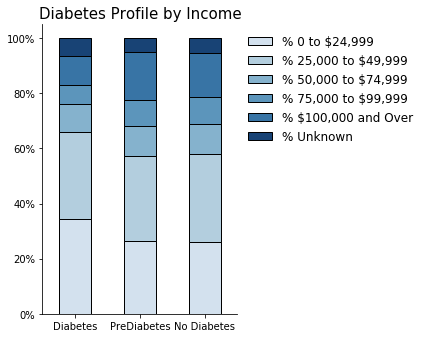

In [307]:
pal = ['#d3e1ee','#b3cede','#85b2cd','#5c95bb', '#3874a5','#184375']

ax = df_Inc.plot( x='Group',kind='bar', stacked=True,color=pal,align="center",edgecolor='black')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title(label="Diabetes Profile by Income", fontsize=15, loc='center')
ax.set_xlabel(' ')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

plt.legend(frameon=False, bbox_to_anchor=(1, 1),fontsize=12)
plt.rcParams["figure.figsize"] = [6, 5]
#plt.rcParams["figure.autolayout"] = True
ax.set_xticks(range(len(df_Inc.Group)))
plt.xticks(rotation=0,fontsize=10)
plt.yticks(fontsize=10)
#plt.savefig('IncProfile.png', bbox_inches='tight')
plt.show